# 0. Content

    1. Import Library & Data
    2. Data Prepping
    3. Time Series Analysis - Decompose
    4. Check for Stationarity - Dicky Fuller
    5. Check for Autocorrelation
    6. Stationarizing the time series

# 1. Import Library & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r"C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Education Completion Analysis"

In [3]:
#Import time series data
df = pd.read_csv(os.path.join(path,'02 Data','Original Data','API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4888889.csv'))

In [4]:
df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,12/22/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.00000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.00000,2021.000000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.30798,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.86356,29342.100860
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1760.216229,1731.795976,1719.80919,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.76916,1537.336021


# 2. Data Prepping

In [5]:
# Remove first 2 rows
df = df.iloc[2:]
df

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
6,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901
265,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1349.990295,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN
266,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
267,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


Alternative code to above:
df.drop(index=df.index[:2],inplace=True)
df.head()

In [6]:
# Make first row as new header
new_header = df.iloc[0]
new_header

Data Source                       Country Name
World Development Indicators      Country Code
Unnamed: 2                      Indicator Name
Unnamed: 3                      Indicator Code
Unnamed: 4                              1960.0
                                     ...      
Unnamed: 61                             2017.0
Unnamed: 62                             2018.0
Unnamed: 63                             2019.0
Unnamed: 64                             2020.0
Unnamed: 65                             2021.0
Name: 2, Length: 66, dtype: object

In [7]:
df.columns = new_header
df.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
6,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626


In [8]:
# For this exercise we will focus on one of the low GDP/ Low income countries - Chad. Locate Chad and delete all other data
df_chad = df[df['Country Name']=='Chad']
df_chad

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
232,Chad,TCD,GDP per capita (current US$),NY.GDP.PCAP.CD,103.537482,108.16465,113.598546,115.804587,119.828081,124.965247,...,969.616215,980.083592,1017.787824,774.4116,691.980095,662.89753,720.265047,701.621217,643.772221,685.690284


In [9]:
# Drop unnecessary columns
df_chad = df_chad.drop (columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df_chad

2,Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
232,Chad,103.537482,108.16465,113.598546,115.804587,119.828081,124.965247,127.342662,129.945114,128.724044,...,969.616215,980.083592,1017.787824,774.4116,691.980095,662.89753,720.265047,701.621217,643.772221,685.690284


In [10]:
# Transpose Data
df_chadT = df_chad.T
df_chadT

,232
2,
Country Name,Chad
1960.0,103.537482
1961.0,108.16465
1962.0,113.598546
1963.0,115.804587
...,...
2017.0,662.89753
2018.0,720.265047
2019.0,701.621217


In [11]:
df_chadT.reset_index(inplace=True)
df_chadT.head()

,2,232
0,Country Name,Chad
1,1960.0,103.537482
2,1961.0,108.16465
3,1962.0,113.598546
4,1963.0,115.804587


In [12]:
new_header2 = df_chadT.iloc[0]
new_header2

2      Country Name
232            Chad
Name: 0, dtype: object

In [13]:
df_chadT.columns = new_header2
df_chadT.head()

,Country Name,Chad
0,Country Name,Chad
1,1960.0,103.537482
2,1961.0,108.16465
3,1962.0,113.598546
4,1963.0,115.804587


In [14]:
# Remove first row
df_chadT = df_chadT.iloc[1:]
df_chadT

,Country Name,Chad
1,1960.0,103.537482
2,1961.0,108.16465
3,1962.0,113.598546
4,1963.0,115.804587
5,1964.0,119.828081
...,...,...
58,2017.0,662.89753
59,2018.0,720.265047
60,2019.0,701.621217
61,2020.0,643.772221


In [15]:
df_chadT.rename(columns={'Country Name': 'Year','Chad':'GDP_PerCapita $'},inplace=True)
df_chadT.head()

,Year,GDP_PerCapita $
1,1960.0,103.537482
2,1961.0,108.16465
3,1962.0,113.598546
4,1963.0,115.804587
5,1964.0,119.828081


In [16]:
df_chadT.dtypes

0
Year               object
GDP_PerCapita $    object
dtype: object

In [17]:
df_chadT['Year']=df_chadT['Year'].astype('int32')
df_chadT['GDP_PerCapita $']=df_chadT['GDP_PerCapita $'].astype('float64')

In [18]:
df_chadT.describe()

,Year,GDP_PerCapita $
count,62.000000,62.000000
mean,1990.500000,364.446469
std,18.041619,286.640794
min,1960.000000,103.537482
25%,1975.250000,168.915270
50%,1990.500000,221.956350
75%,2005.750000,658.116203
max,2021.000000,1017.787824


In [19]:
df_chadT.head()

,Year,GDP_PerCapita $
1,1960,103.537482
2,1961,108.164650
3,1962,113.598546
4,1963,115.804587
5,1964,119.828081


In [20]:
# Selecting data from 1980 onwards to reflect relevant economic conditions
df_chadT_filter = df_chadT.loc[df_chadT['Year']>=1980]

In [21]:
df_chadT_filter.head()

,Year,GDP_PerCapita $
21,1980,234.334960
22,1981,198.887006
23,1982,180.489056
24,1983,171.308123
25,1984,186.788594


In [22]:
# Creating a datetime index column from Year to be able to run decompostion later
from datetime import datetime

df_chadT_filter['Year_datetime'] = pd.to_datetime(df_chadT_filter['Year'], format='%Y')

In [23]:
df_chadT_filter.head()

,Year,GDP_PerCapita $,Year_datetime
21,1980,234.334960,1980-01-01
22,1981,198.887006,1981-01-01
23,1982,180.489056,1982-01-01
24,1983,171.308123,1983-01-01
25,1984,186.788594,1984-01-01


In [24]:
#Drop original year column
df_chadT_filter=df_chadT_filter[['Year_datetime','GDP_PerCapita $']]
df_chadT_filter.head()

,Year_datetime,GDP_PerCapita $
21,1980-01-01,234.334960
22,1981-01-01,198.887006
23,1982-01-01,180.489056
24,1983-01-01,171.308123
25,1984-01-01,186.788594


In [25]:
#Set year as index back again
df_chadT_filter = df_chadT_filter.set_index('Year_datetime') 

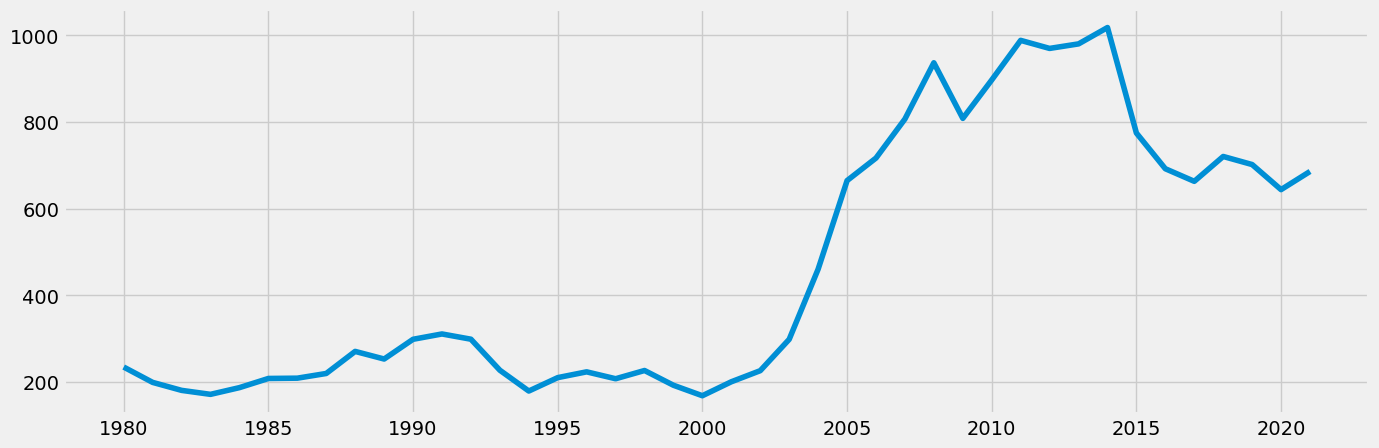

In [26]:
# Plot chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_chadT_filter)

In [27]:
# Check for missing values (you shouldn't have any)
df_chadT_filter.isnull().sum() 

0
GDP_PerCapita $    0
dtype: int64

In [28]:
# Check for duplicates
dups = df_chadT_filter.duplicated()
dups.sum()

0

# 3. Time Series Analysis - Decompose

In [29]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_chadT_filter, model='additive')

In [30]:
# Define a fixed size for all special charts.
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

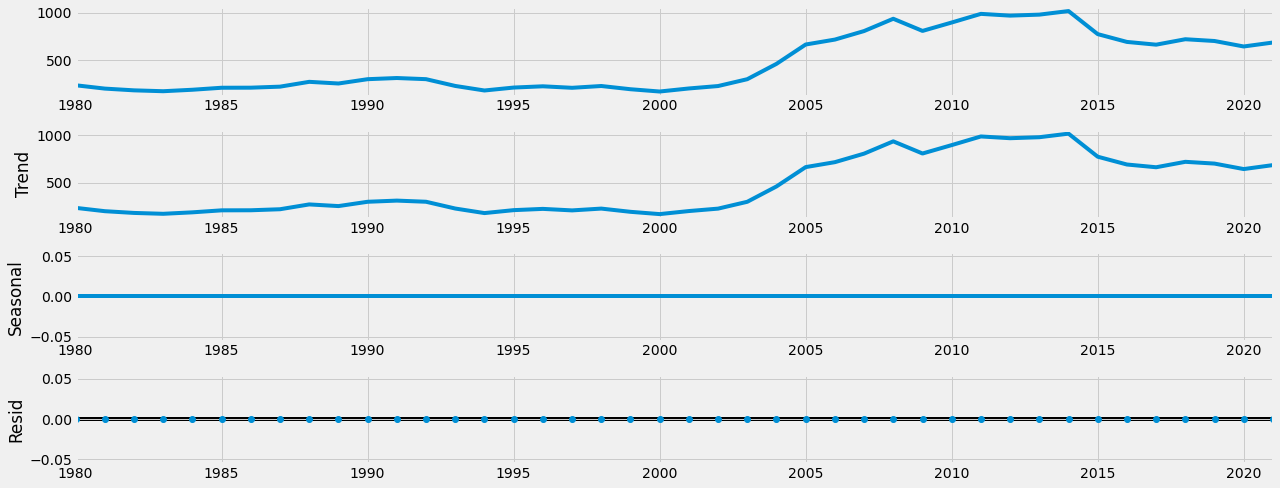

In [31]:
# Plotting decompositions
decomposition.plot()
plt.show()

The decomposition shows that the series is affected mainly by trend with n seasonality or noise. We know it's not stationary but lets confirm that with a test.

# 4.Check for Stationarity - Dicky Fuller

Null Hypothesis = data is not stationary

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_chadT_filter['GDP_PerCapita $'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.111512
p-value                         0.710459
Number of Lags Used             1.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


The test statistic is larger than the critical value (-1.1 vs -2.9). Also, p-value is greater than 0.05. We cannot reject null hypothesis, which means data is not stationary.

# 5. Check for Autocorrelations

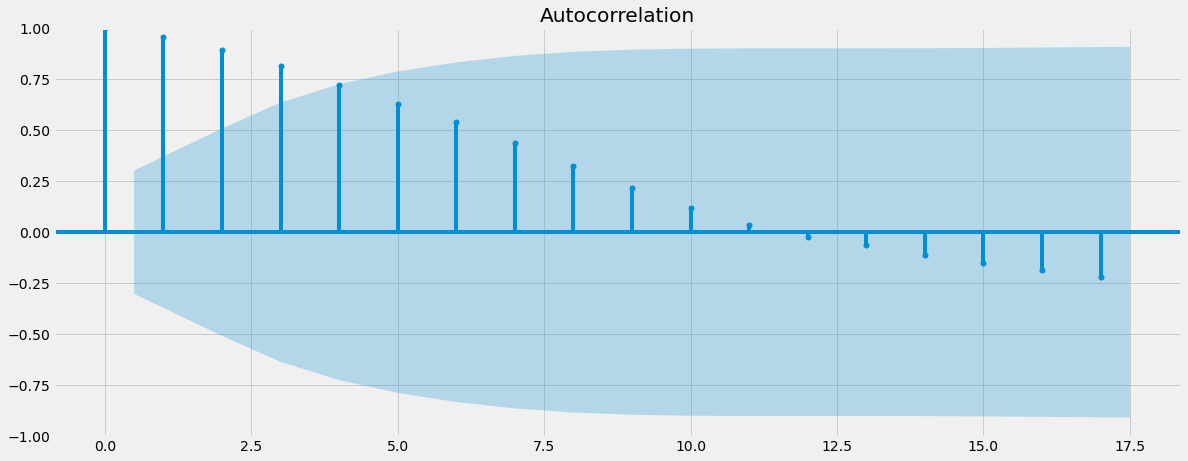

In [33]:
# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_chadT_filter)
plt.show()

There are only a few autocorrelated data (autocorrelated lags), as represented by the dots outside of the shaded blue confidence interval.

# 6. Stationarizing the time series

In [34]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = df_chadT_filter - df_chadT_filter.shift(1) 

In [35]:
data_diff.head()

,GDP_PerCapita $
Year_datetime,
1980-01-01,NaN
1981-01-01,-35.447954
1982-01-01,-18.397951
1983-01-01,-9.180933
1984-01-01,15.480471


In [36]:
# Remove the missing values that came about as a result of the differencing to be able to run the Dickey-Fuller test.
data_diff.dropna(inplace = True) 

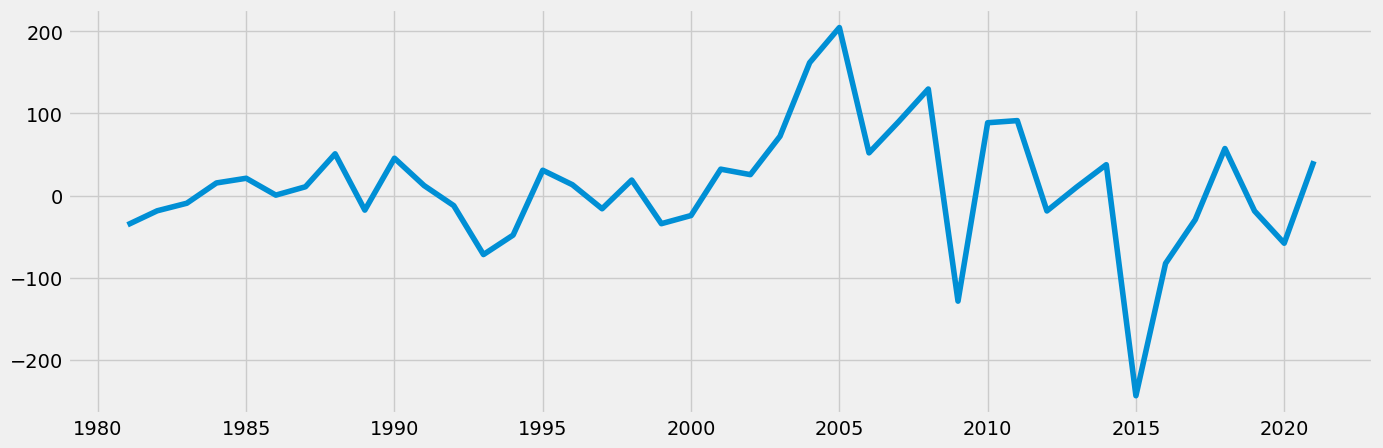

In [37]:
# Plot series after differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
# Running dicky fuller after differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.714376
p-value                         0.000079
Number of Lags Used             0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


Test statistic is smaller than the critical value at 5% (-4 vs -2) and p-value is <0.05, which means we can reject the null hypothesis that says data is non stationary. Data is now stationary!

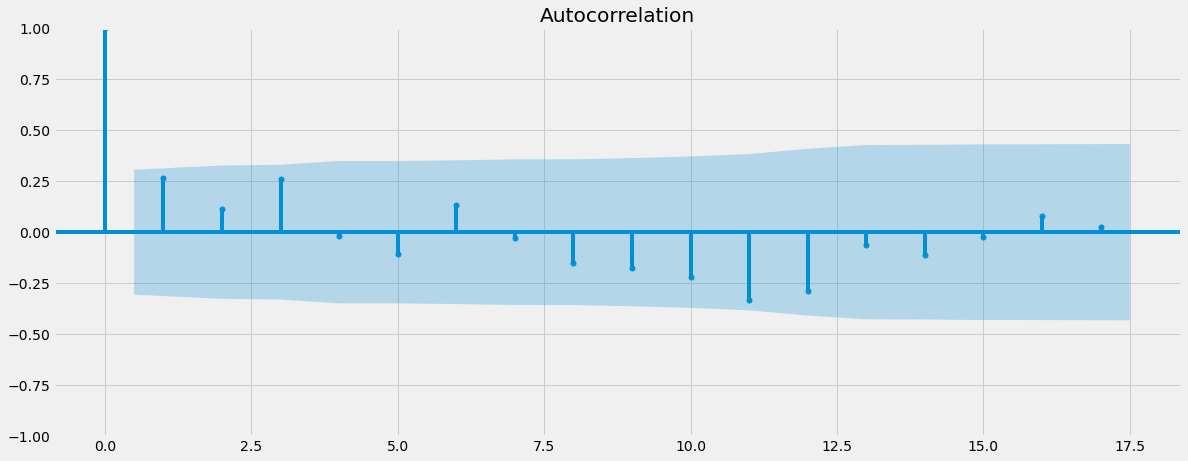

In [39]:
# Checking for auto correlations again
plot_acf(data_diff)
plt.show()

Most autocorrelated lags are reduced

# Bonus Task

 1. Defining Your Parameters
 2. Splitting the Data
 3. Running and Fitting the Model
 4. Iterating

### 1. Defining Parameters

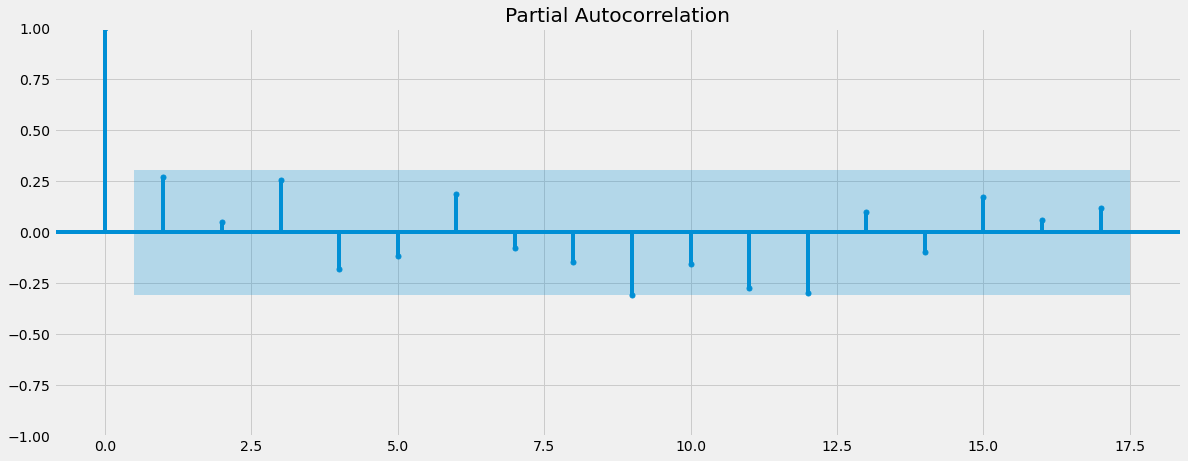

<Figure size 4500x4500 with 0 Axes>

In [40]:
# Plotting partial autocorrelation to determine p
plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

Only one bar slightly higher in value. Will pick 1 AR term to start with, so p=1

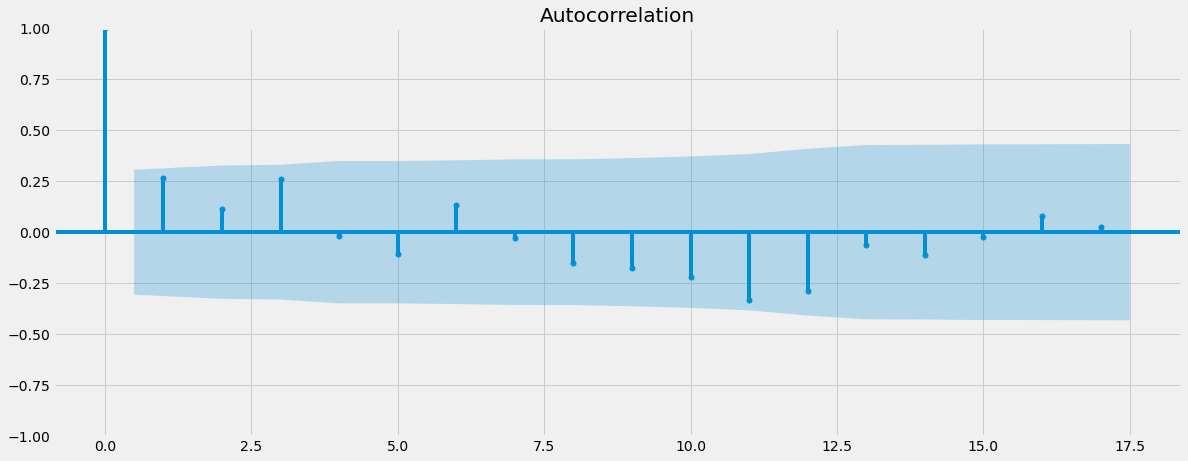

<Figure size 1500x500 with 0 Axes>

In [41]:
# Plotting autocorrelation to determine q
plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

Again, only 1 significant autocorrelation lag, so will pick 1 MA term, so q=1

### 2. Splitting the Data

In [42]:
data_diff.shape

(41, 1)

Choosing to pick the split at year 2010/2011

In [43]:
# Split the data
train = data_diff['GDP_PerCapita $'][:31]
test = data_diff['GDP_PerCapita $'][30:]

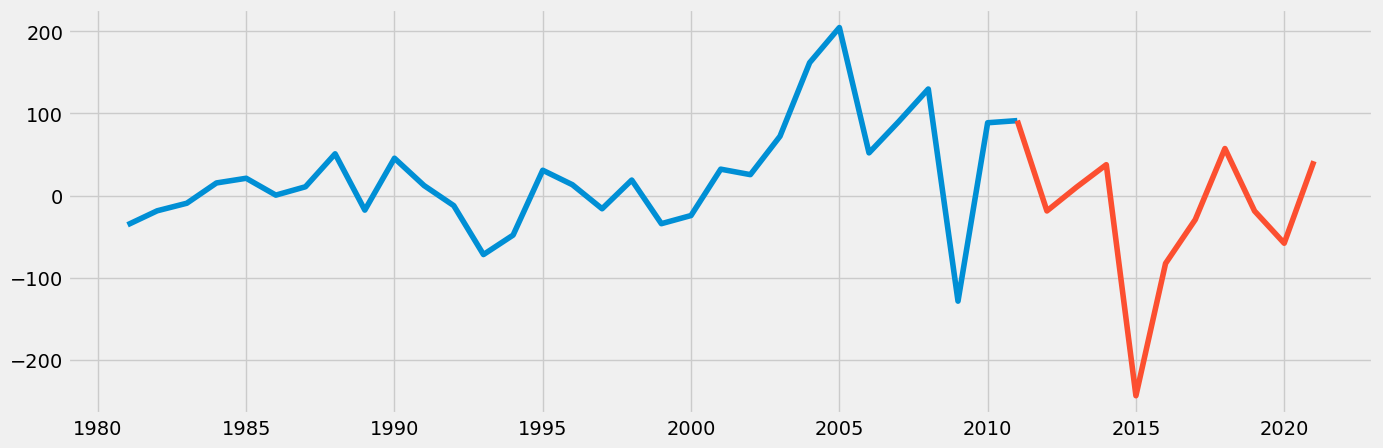

In [44]:
# Plot both sets in order to see the split
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [45]:
test.shape

(11,)

### 3. Running and Fitting Model

In [46]:
# Import ARIMA model
from statsmodels.tsa.api import ARIMA

In [47]:
data_diff.columns

Index(['GDP_PerCapita $'], dtype='object', name=0)

In [48]:
# Run ARIMA
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast with 95% confidence interval  --> alpha = 0.05; 
fc, se, conf = fitted.forecast(3, alpha=0.05) 
#Error says 3 is the expected value to pack

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:        GDP_PerCapita $   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -168.126
Date:                Thu, 09 Mar 2023   AIC                            342.251
Time:                        13:26:32   BIC                            346.455
Sample:                    01-01-1981   HQIC                           343.596
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1641      0.244      0.674      0.500      -0.313       0.641
ma.L1         -0.8226      0.145     -5.664      0.000      -1.107      -0.538
sigma2      4195.6336    920.516      4.558      0.0

TypeError: 'float' object is not subscriptable